In [ ]:
import matplotlib.pyplot as plt
import numpy as np

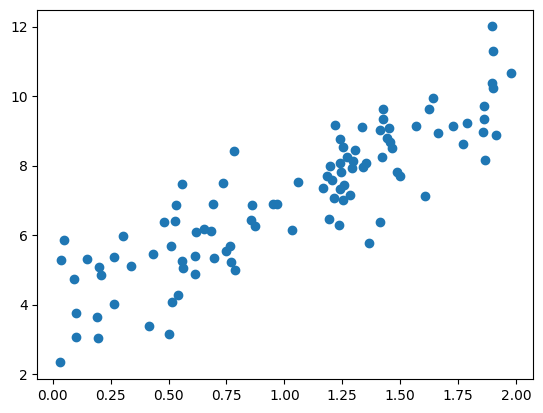

In [ ]:
x = 2 * np.random.rand(100,1) # 0, 1 사이의 균일 분포 -> shape : 100 X 1 array
y = 4 + 3*x + np.random.randn(100,1) # 일차방정식, randn : normal distribution(mu=0, var(분산)=1)분포 shape : 100 X 1 array
plt.scatter(x,y)
plt.show()

In [ ]:
x_bias = np.c_[np.ones((100,1)),x] # 모든 샘플에 index 0번에 1을 추가하겠다.
x_bias

array([[1.        , 0.50816918],
       [1.        , 0.61269202],
       [1.        , 1.90075806],
       [1.        , 1.41518471],
       [1.        , 1.45501782],
       [1.        , 0.19154422],
       [1.        , 1.29503547],
       [1.        , 1.42469974],
       [1.        , 0.30308269],
       [1.        , 0.76456789],
       [1.        , 1.30455505],
       [1.        , 0.47838815],
       [1.        , 0.68332253],
       [1.        , 0.33858869],
       [1.        , 1.78748049],
       [1.        , 1.20686271],
       [1.        , 0.56198644],
       [1.        , 0.50356353],
       [1.        , 1.45006361],
       [1.        , 1.66245523],
       [1.        , 1.62454039],
       [1.        , 0.43183558],
       [1.        , 1.77352568],
       [1.        , 1.23550988],
       [1.        , 1.2544522 ],
       [1.        , 1.24244102],
       [1.        , 1.06060552],
       [1.        , 0.09990061],
       [1.        , 1.64407777],
       [1.        , 0.65237047],
       [1.

In [ ]:
# np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
# .dot은 행렬 곱셈
# 정규 방정식(Normal equation)을 구현한다. 최적의 파라미터을 구해준다.
# 위에서 noise 를 추가해서 정확한 예측은 불가능하다.
theta_best = np.linalg.inv(x_bias.T.dot(x_bias)).dot(x_bias.T).dot(y)
theta_best

array([[3.81620902],
       [3.1559513 ]])

In [ ]:
# theta_best를 사용해서 y 값 예측
x_new = np.array([[0],[2]]) # 새롭게 데이터를 예측해준다.
x_new_b = np.c_[np.ones((2,1)),x_new] # bias_term 을 추가 / 학습을 위해서 가상의 데이터를 추가해준다.
prediction = x_new_b.dot(theta_best)
prediction

array([[ 3.81620902],
       [10.12811161]])

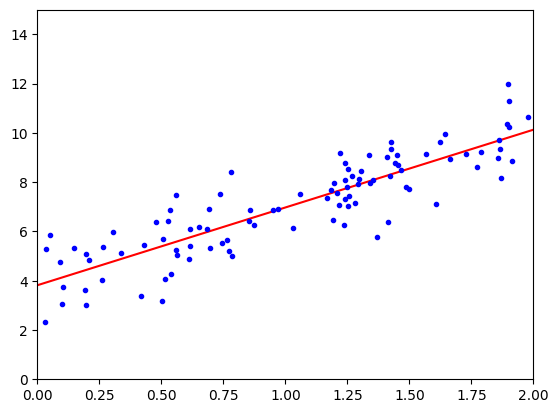

In [ ]:
plt.plot(x_new,prediction,"r-")
plt.plot(x,y,"b.")
plt.axis([0, 2, 0, 15]) # x축 범위 0~2, y축 범위 0~15
plt.show()

In [ ]:
# 위의 모델링 작업을 코드로 작성하기.
from sklearn.linear_model import LinearRegression

# 선형회귀 모델을 만든다.
lin_reg = LinearRegression()

# 학습용 데이터를 생성, 학습, 예측을 실행
lin_reg.fit(x,y)

print(lin_reg.intercept_,lin_reg.coef_)

print(lin_reg.predict(x_new))

[3.81620902] [[3.1559513]]
[[ 3.81620902]
 [10.12811161]]


In [ ]:
# 경사 하강법 구현(implementation)
import numpy as np

x = 2 * np.random.rand(100,1) # 100 x 1 크기의 0~1의 균일분포
x_b = np.c_[np.ones((100,1)),x] # bias(1)를 전체 데이터에 추가
y = 4 + 3*np.random.randn(100,1) # 100 x 1 크기의 표준정규분포 추출

learning_rate = 0.001 # 학습률
iterations = 1000 # 1000번을 반복하겠다.
m = x_b.shape[0] # 100개 (x 데이터)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y) # 기울기
  theta = theta - (learning_rate * gradients) # 경사하강법으로 최적 기울기값(파라미터)을 구한다.


# 정규방정식으로 찾은 것과 정확히 일치한다.
theta

array([[0.26158609],
       [3.04243321]])

In [ ]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0,t1 = 5,50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_b[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

In [ ]:
# 확률적 경사 하강법 구현(implementation)
epochs = 1000
t0,t1 = 5,50 # 학습 스케쥴 (하이퍼 파라미터)
m = x_b.shape[0] # 100개 (x 데이터)

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) # 2x1 크기의 평균 0, 분산1 정규 분포 추출

for epoch in range(epochs):
  for i in range(m):
    random_index = np.random.randint(m) # 0 ~ m-1까지 랜덤 숫자 1
    xi = x_b[random_index:random_index:+1] # 1 x 2 크기
    yi = y[random_index:random_index+1] # 1 x 1 크기
    gradients = 2 * xi.T.dot(xi.dot(theta)-yi) # 1 => mini_m
    learning_rate = learning_schedule(epoch*m + i)
    theta = theta - learning_rate * gradients

1차 방정식

y = ax

n차 방정식

y = ax + ax^2 + ..... + ax^n

In [30]:
import numpy as np
data_num = 1000
x = 3 * np.random.rand(data_num,1) - 1 # 균일 분포
y = 0.2 * (x**2) + np.random.randn(1000,1) # 제곱 -> 2차 방정식으로 만들어준다.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0])
print(x_poly[0])

[-0.16155971]
[-0.16155971  0.02610154]


In [32]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y) # training
print(lin_reg.intercept_,lin_reg.coef_) # 2차 방정식에 해당하는 2w 값이 나온다.

[0.08405138] [[0.01397642 0.14888426]]


In [33]:
from sklearn.metrics import mean_squared_error # MSE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_learning_curves(model,x,y):
  x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2) # test size = 0.2 -> 검증용 train -> 0.8, 훈련용
  train_errors,val_errors = [],[]

  for num in range(1,len(x_train)):
    model.fit(x_train[:num],y_train[:num])
    y_train_predict = model.predict(x_train[:num])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:num],y_train_predict)) # MSE 를 구하는 것 -> 리스트에 넣는다.
    val_errors.append(mean_squared_error(y_val,y_val_predict))

  plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train_set')
  plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val_set')
  plt.legend()
  plt.show()

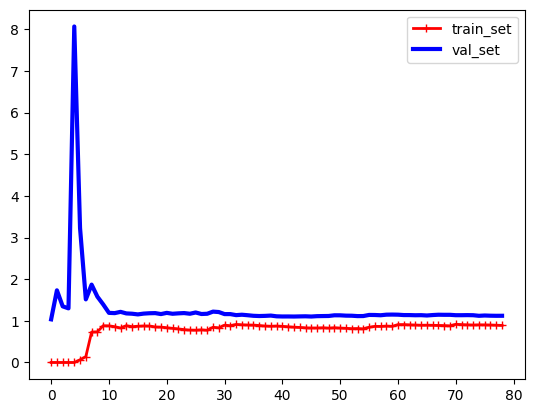

In [34]:
from sklearn.pipeline import Pipeline
data_num = 100
x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)
polynomial_regression = Pipeline([
  ("poly_features",PolynomialFeatures(degree=4,include_bias=False)), # 4차 다항식으로 변경
  ("lin_reg",LinearRegression())
  ])
plot_learning_curves(polynomial_regression,x,y)

In [35]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

x = 3 * np.random.rand(data_num,1) - 1
y = 0.2 * x**2 + np.random.randn(100,1)

# poly + standard 파이프라인으로 합쳐준다.
poly_scaler = Pipeline([
                        ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
                        ('std_scaler',StandardScaler())
])

# 검증 20, 훈련 80
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)
# fit_transform 을 하고 transfrom만 해야한다.
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

# warm_start=True 이면 fit 메서드가 호출될 때 처음부터 다시 하지 않고 이전 모델 파라미터에서 훈련 이어짐
# penalty : {‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’
# n_iter_no_change : Number of iterations with no improvement to wait before stopping fitting
# 'constant' : eta = eta0
# 'optimal' : eta = 1.0 / (alpha * (t + t0))
# 'invscaling' : eta = eta0 / pow(t, power_t)
# 'adaptive' : eta = eta0, as long as the training keeps decreasing

# 실수를 하면 정지하겠다.
sgd_reg = SGDRegressor(n_iter_no_change=1,warm_start=True,penalty=None,
                       learning_rate='constant',eta0=0.0005) # gloabl min 의 해결책으로 활용

SGDRegressor()
# 맨 처음 에러는 무한대에서부터 시작하겠다.
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled,y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val,y_val_predict)

  # error 값을 최신화 시킨다.
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)
print('best_epoch : ',best_epoch)
print('best_model : ',best_model)

best_epoch :  0
best_model :  SGDRegressor(eta0=0.0005, learning_rate='constant', n_iter_no_change=1,
             penalty=None, warm_start=True)
